In [7]:
import pandas as pd
import numpy as np

# Citirea datelor
data = pd.read_csv('C:/Users/cosmi/Downloads/archive/data.csv')

# Funcție pentru calcularea Gini Index
def gini_index(groups, classes):
    # numărul total de exemple
    n_instances = float(sum([len(group) for group in groups]))
    
    # suma ponderată a scorului Gini pentru fiecare grup
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # evita divizarea prin zero
        if size == 0:
            continue
        score = 0.0
        # scorul Gini pentru fiecare clasă
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # ponderea grupului
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Gruparea datelor în funcție de o condiție (e.g., "liked")
class_values = [0, 1]
group1 = data[data['liked'] == 0].values.tolist()
group2 = data[data['liked'] == 1].values.tolist()

gini = gini_index([group1, group2], class_values)
print('Gini Index:', gini)


Gini Index: 0.0


In [18]:
import pandas as pd

df = pd.read_csv('data.csv')

print(df.head())  # Primele 5 rânduri
print(df.info())  # Informații despre date (tipuri de date, valori lipsă)
print(df.describe())  # Statistici descriptive

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  
0      0  
1      1  
2      0  
3      1  
4      1  
<c

In [4]:
from math import log2

def entropy(s):
    counts = np.bincount(s)
    probabilities = counts / len(s)
    return -sum(p * log2(p) for p in probabilities if p > 0)

def information_gain(y, y1, y2):
    p = len(y1) / len(y)
    return entropy(y) - p * entropy(y1) - (1 - p) * entropy(y2)

# Exemplu de utilizare
# Vectorul de ieșire "liked"
y = data['liked'].values
# Exemplu de împărțire a datelor (trebuie adaptat la o condiție specifică)
split_condition = data['energy'] > 0.5
y1 = data[split_condition]['liked'].values
y2 = data[~split_condition]['liked'].values

info_gain = information_gain(y, y1, y2)
print('Information Gain:', info_gain)


Information Gain: 0.052478204814611296


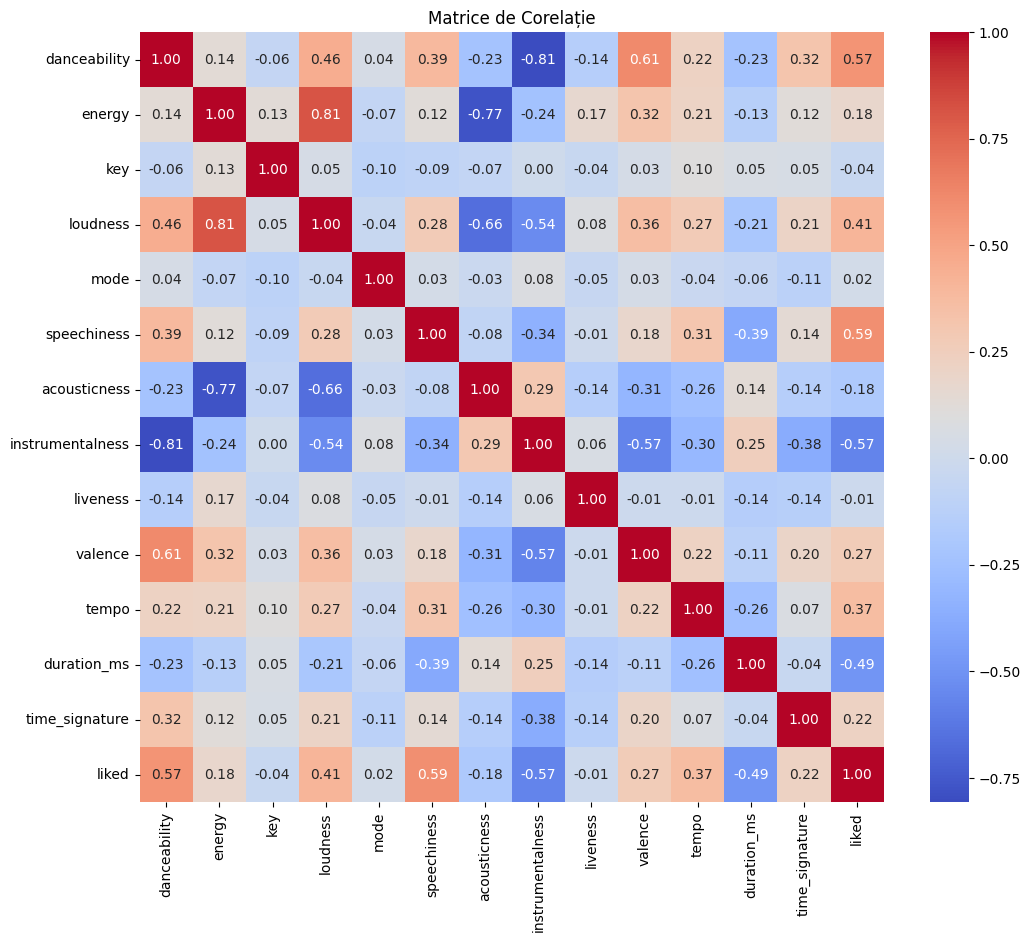

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corelație')
plt.show()

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Citirea datelor
data = pd.read_csv('C:/Users/cosmi/Downloads/archive/data.csv')

# Separarea variabilelor de intrare (X) și a variabilei țintă (y)
X = data.drop(columns=['liked'])
y = data['liked']

# Împărțirea setului de date în seturi de antrenament și test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizarea datelor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definirea modelului Logistic Regression
lr = LogisticRegression()

# Definirea grilei de hiperparametri pentru Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Optimizarea hiperparametrilor folosind GridSearchCV
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Cel mai bun model
best_lr = grid_lr.best_estimator_

# Evaluarea modelului pe setul de test
y_pred = best_lr.predict(X_test)

# Afișarea rezultatelor
print('---- Logistic Regression ----')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


---- Logistic Regression ----
Accuracy: 0.8983050847457628
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.93      0.87      0.90        31

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59

Confusion Matrix:
[[26  2]
 [ 4 27]]


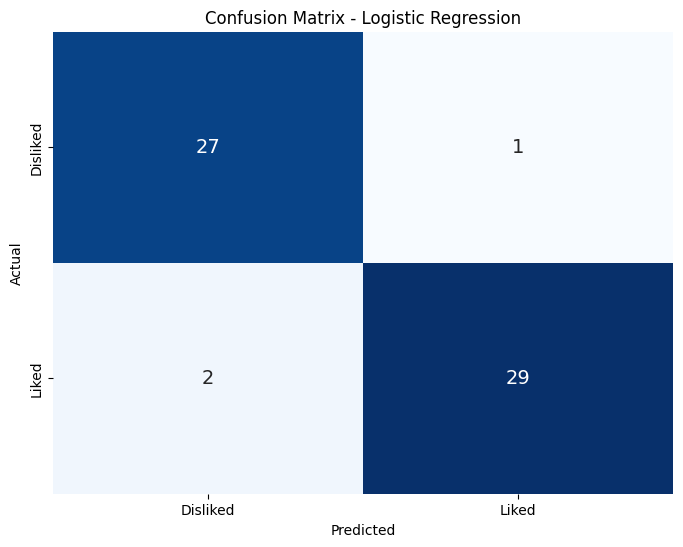

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcularea matricei de confuzie
cm = confusion_matrix(y_test, y_pred)

# Afișarea matricei de confuzie sub formă de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, 
            annot_kws={'fontsize': 14}, 
            xticklabels=['Disliked', 'Liked'], 
            yticklabels=['Disliked', 'Liked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


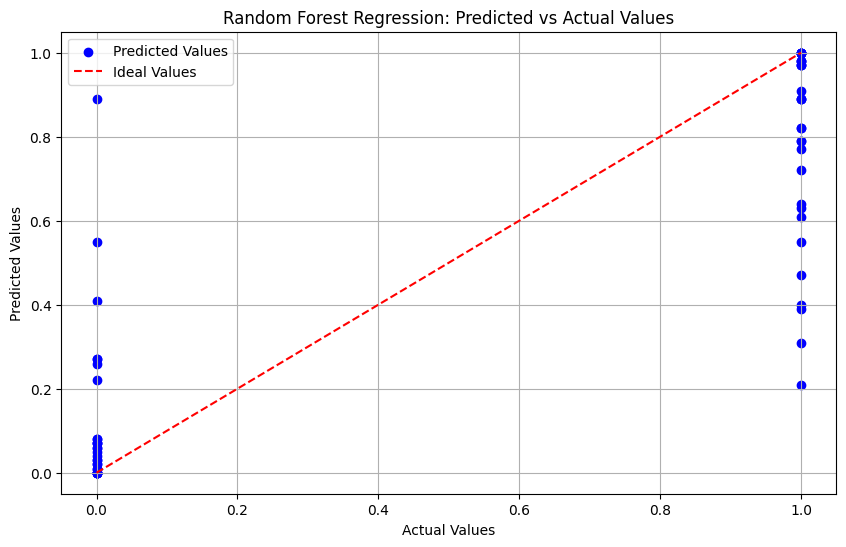

In [28]:
import matplotlib.pyplot as plt

# Crearea unui grafic pentru valorile prezise versus valorile reale
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg, color='blue', label='Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Ideal Values')
plt.title('Random Forest Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

# Definirea modelului SVM
svm = SVC(kernel='linear')

# Antrenarea modelului
svm.fit(X_train, y_train)

# Realizarea predicțiilor pe setul de test
y_pred_svm = svm.predict(X_test)

# Crearea obiectului de matrice de confuzie
disp_svm = plot_confusion_matrix(svm, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

# Afișarea matricei de confuzie
disp_svm.ax_.set_title('Confusion Matrix - SVM')
plt.show()


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\cosmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\__init__.py)

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Citirea datelor
data = pd.read_csv('C:/Users/cosmi/Downloads/archive/data.csv')

# Separarea variabilelor de intrare (X) și a variabilei țintă (y)
X = data.drop(columns=['liked'])
y = data['liked']

# Împărțirea setului de date în seturi de antrenament și test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizarea datelor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definirea modelului Random Forest
rf = RandomForestClassifier(random_state=42)

# Definirea grilei de hiperparametri pentru Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Optimizarea hiperparametrilor folosind GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Cel mai bun model
best_rf = grid_rf.best_estimator_

# Evaluarea modelului pe setul de test
y_pred = best_rf.predict(X_test)

# Afișarea rezultatelor
print('---- Random Forest ----')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


---- Random Forest ----
Accuracy: 0.864406779661017
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.93      0.81      0.86        31

    accuracy                           0.86        59
   macro avg       0.87      0.87      0.86        59
weighted avg       0.87      0.86      0.86        59

Confusion Matrix:
[[26  2]
 [ 6 25]]


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Citirea datelor
data = pd.read_csv('C:/Users/cosmi/Downloads/archive/data.csv')

# Separarea variabilelor de intrare (X) și a variabilei țintă (y)
X = data.drop(columns=['liked'])
y = data['liked']

# Împărțirea setului de date în seturi de antrenament și test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizarea datelor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definirea modelului SVM
svm = SVC()

# Definirea grilei de hiperparametri pentru SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Optimizarea hiperparametrilor folosind GridSearchCV
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

# Cel mai bun model
best_svm = grid_svm.best_estimator_

# Evaluarea modelului pe setul de test
y_pred = best_svm.predict(X_test)

# Afișarea rezultatelor
print('---- SVM ----')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


---- SVM ----
Accuracy: 0.9491525423728814
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.97      0.94      0.95        31

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

Confusion Matrix:
[[27  1]
 [ 2 29]]
